In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_d9b6fbba318e4314881ce30fbbe9dc9a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='daNnSlckoQcTnBf917vF-nRnq79sWJsanoX9PN3tBXPS',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_d9b6fbba318e4314881ce30fbbe9dc9a.get_object(Bucket='ibmmachinelearning-donotdelete-pr-ogdvs2xpoqt1ek',Key='ks-projects-201801.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [2]:
df_data_1['deadline']= pd.to_datetime(df_data_1['deadline'])
df_data_1['launched']= pd.to_datetime(df_data_1['launched'])

In [3]:
df_data_1.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

In [4]:
df=df_data_1

In [5]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [6]:
df_canceled = df.groupby(['state']).sum()

In [7]:
df_canceled.head()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
state,,,,,,,
canceled,41729536677112,3.342481e+09,1.025996e+08,1007765,7.268735e+07,9.076309e+07,2.930894e+09
failed,212476501281977,1.331575e+10,2.821394e+08,3247011,2.240431e+08,2.611085e+08,1.249085e+10
live,3034885947162,2.148579e+08,2.542959e+07,190611,3.509041e+06,1.642780e+07,1.750363e+08
successful,143832215325947,1.361390e+09,3.228310e+09,35353850,2.323123e+09,3.036889e+09,1.276983e+09
suspended,2020082299127,3.348105e+08,1.996784e+07,193982,1.445427e+07,1.719066e+07,3.234340e+08


In [8]:
df_categroies = df.groupby(['category']).sum()
df_maincategories = df.groupby(['main_category']).sum()

In [9]:
df_maincategories.head(10)

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
main_category,,,,,,,
Art,30342957461667,1.149464e+09,1.015470e+08,1188200,7.134131e+07,9.068045e+07,1.103558e+09
Comics,11507208333615,2.190160e+08,7.464365e+07,1458090,5.781692e+07,7.151839e+07,2.117433e+08
Crafts,9500745050295,1.021164e+08,1.776030e+07,240342,1.038749e+07,1.438428e+07,9.191721e+07
Dance,4052295222273,3.889078e+07,1.390693e+07,161275,1.116158e+07,1.301070e+07,3.612882e+07
Design,32424491060437,1.405280e+09,8.154909e+08,7255880,5.121320e+08,7.342202e+08,1.259073e+09
Fashion,24406041617687,5.662531e+08,1.494227e+08,1401993,9.762923e+07,1.303353e+08,5.113615e+08
Film & Video,68351773147347,5.362378e+09,4.045744e+08,4197577,3.468760e+08,3.915551e+08,5.253729e+09
Food,26616763116836,1.197964e+09,1.313787e+08,1332751,1.035602e+08,1.258065e+08,1.206473e+09
Games,37772167373827,1.786610e+09,7.703319e+08,11336829,5.744020e+08,7.413273e+08,1.582708e+09


In [10]:
df_categroies.head()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
category,,,,,,,
3D Printing,734396438229,32650430.0,48625085.45,158779,35534549.06,45299197.48,3.184133e+07
Academic,999354604662,52398035.0,3519050.98,37751,1288917.95,2648168.72,4.995091e+07
Accessories,3382872312841,60038491.0,25519094.19,256036,13875827.91,20655724.26,4.647395e+07
Action,786019425291,248962666.0,2734023.34,34708,2188872.80,2737575.48,2.346959e+08
Animals,291160283692,2962741.0,718150.57,10748,598025.71,763523.57,2.699555e+06


In [11]:
df_states = df_data_1['state']

In [12]:
import numpy as np
%pylab inline

%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
import math

Populating the interactive namespace from numpy and matplotlib


In [13]:
#df.groupby(['main_category']).sum().plot(kind='pie', y='main_categories')

In [14]:
df_statesandcategories = df[['category', 'state']]

In [15]:
df_statesandcategories.head()

,category,state
0,Poetry,failed
1,Narrative Film,failed
2,Narrative Film,failed
3,Music,failed
4,Film & Video,canceled


In [16]:
df_data_2 = df_data_1.drop(columns=['ID', 'name', 'category', 'currency', 'deadline', 'goal', 'launched', 'backers', 'pledged', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'])
df_data_2.head()

,main_category,state,country
0,Publishing,failed,GB
1,Film & Video,failed,US
2,Film & Video,failed,US
3,Music,failed,US
4,Film & Video,canceled,US


In [17]:
df_data_2.groupby('state').filter(lambda g: (g.nunique() > 1).any())

,main_category,state,country
0,Publishing,failed,GB
1,Film & Video,failed,US
2,Film & Video,failed,US
3,Music,failed,US
4,Film & Video,canceled,US
...,...,...,...
378656,Film & Video,canceled,US
378657,Film & Video,failed,US
378658,Film & Video,failed,US
378659,Technology,failed,US


In [18]:
df_data_3 = df_data_2[['state', 'main_category', 'country']]
df_data_3.head()

,state,main_category,country
0,failed,Publishing,GB
1,failed,Film & Video,US
2,failed,Film & Video,US
3,failed,Music,US
4,canceled,Film & Video,US


In [19]:
df_data_3.groupby('state').nunique()

,state,main_category,country
state,,,
canceled,1,15,23
failed,1,15,23
live,1,15,23
successful,1,15,23
suspended,1,15,21
undefined,1,10,1


In [20]:
x5=df.groupby(by='category', as_index=False).agg({'state': pd.Series.nunique})
x5.head()

,category,state
0,3D Printing,6
1,Academic,5
2,Accessories,6
3,Action,5
4,Animals,5


<h1> Access Data Via SQL </h1>

In [21]:
import ibm_db

## Create the DB2 database connection

Ibm_db API uses the IBM Data Server Driver for ODBC and CLI APIs to connect to IBM DB2 and Informix.


Lets build the dsn connection string using the credentials you entered above


In [22]:
#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "YourDb2Hostname" # e.g.: "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_uid = "YourDb2Username"        # e.g. "abc12345"
dsn_pwd = "YoueDb2Password"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "50000"                # e.g. "50000" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"

In [23]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
#dsn = (
    #"DRIVER={0};"
    #"DATABASE={1};"
    #"HOSTNAME={2};"
   # "PORT={3};"
   # "PROTOCOL={4};"
  #  "UID={5};"
  #  "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

#print the connection string to check correct values are specified
#print(dsn)

Now establish the connection to the database

In [24]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create database connection

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )


Unable to connect:  


In [25]:
failed_cols = [col for col in  df_data_1.columns if 'failed' in col]

In [26]:
failed_cols

[]

In [27]:
df_filtered = df_data_1.filter(regex='failed')

In [28]:
df_filtered

""
0
1
2
3
4
...
378656
378657
378658
378659


In [29]:
grouped_failed_stripped = grouped_failed.drop(['ID', 'name', 'category', 'currency', 'deadline', 'goal', 'launched', 'pledged','backers','country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'], axis= 1)

NameError: name 'grouped_failed' is not defined

In [30]:
filt_cols_failed=df_data_1[df_data_1['state'].str.contains('failed')]

In [31]:
filt_cols_failed

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.0,failed,40,US,453.0,453.0,25000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378654,999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,2017-04-19,6500.0,2017-03-20 22:08:22,154.0,failed,4,US,0.0,154.0,6500.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [32]:
filt_cols_canceled=df_data_1[df_data_1['state'].str.contains('canceled')]

In [33]:
filt_cols_canceled

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00
68,1000256760,"Raise the Woof, expanding the love (Canceled)",Design,Design,CAD,2015-08-07,15000.0,2015-07-08 21:46:53,700.00,canceled,6,CA,553.32,535.09,11466.14
70,1000260691,Gizbee™ Unlimited Removable Storage for Your T...,Gadgets,Technology,USD,2016-03-25,87000.0,2016-02-29 20:30:27,2030.00,canceled,15,US,2030.00,2030.00,87000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378640,999893629,Ciridian Helix (Canceled),Fiction,Publishing,USD,2014-09-11,1000.0,2014-08-08 21:49:31,100.00,canceled,2,US,100.00,100.00,1000.00
378643,999931480,Google Glass Shield (Canceled),3D Printing,Technology,USD,2014-05-26,6500.0,2014-05-05 20:22:45,0.00,canceled,0,US,0.00,0.00,6500.00
378648,999955533,Cards and Chit Network Season 2! (Canceled),Tabletop Games,Games,USD,2016-02-23,500.0,2016-01-24 16:03:27,121.00,canceled,5,US,121.00,121.00,500.00
378655,999976312,Angela's Poetry (Canceled),Poetry,Publishing,CAD,2014-09-20,5500.0,2014-08-06 03:46:07,0.00,canceled,0,CA,0.00,0.00,4949.60


In [34]:
filt_cols_successful=df_data_1[df_data_1['state'].str.contains('successful')]

In [35]:
filt_cols_successful

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.00
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,successful,761,GB,57763.78,121857.33,6469.73
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.00,successful,7,US,250.00,250.00,250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378642,999929142,ÉPOUVANTAILS : 28mm Figurines de jeux pour KIN...,Tabletop Games,Games,EUR,2017-10-31,1000.0,2017-10-04 11:26:44,1246.00,successful,35,FR,66.72,1452.47,1165.70
378644,999934908,The Manual Bar Blade,Product Design,Design,USD,2015-12-15,3500.0,2015-11-23 07:33:14,6169.00,successful,120,US,6169.00,6169.00,3500.00
378646,999943841,The Dog Coffee Book,Children's Books,Publishing,USD,2013-11-30,950.0,2013-10-18 21:35:04,1732.02,successful,31,US,1732.02,1732.02,950.00
378651,999969812,AT THE BEACH,Classical Music,Music,CAD,2014-03-22,5000.0,2014-02-20 01:00:16,5501.00,successful,78,CA,5019.92,4983.69,4529.81


In [36]:
filt_cols_suspended =df_data_1[df_data_1['state'].str.contains('suspended')]

In [37]:
filt_cols_suspended

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
374,1001732009,DotPen : Redefines drawing and writing for sma...,Product Design,Design,USD,2014-08-09,25000.0,2014-06-30 21:17:10,39693.00,suspended,647,US,39693.00,39693.00,25000.00
688,1003367610,Aleppo - Make Soap Not War,Crafts,Crafts,DKK,2017-07-13,55000.0,2017-06-19 08:34:15,20320.00,suspended,60,DK,3059.73,3119.10,8442.45
689,1003378025,Hackchain - The World's First Wearable Wifi Ja...,Wearables,Technology,USD,2017-11-10,30000.0,2017-10-11 03:53:25,994.00,suspended,15,US,557.00,994.00,30000.00
1047,100524873,PRESIDENT OF THE UNITED STATES (Suspended),Academic,Publishing,USD,2015-10-25,5500.0,2015-08-26 05:54:42,0.00,suspended,0,US,0.00,0.00,5500.00
1114,1005618996,Masters of the Tooniverse Podcast (Suspended),Webseries,Film & Video,USD,2013-07-02,3200.0,2013-05-30 19:24:22,3226.00,suspended,24,US,3226.00,3226.00,3200.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377481,994137973,UsBidi - The World's Most Intelligent Charger ...,Gadgets,Technology,AUD,2015-12-04,35000.0,2015-10-20 15:33:54,501964.79,suspended,8180,AU,365230.79,367309.23,25611.01
377485,994145334,Lego super hero cake (Suspended),Events,Food,USD,2015-09-28,100.0,2015-08-30 22:37:59,0.00,suspended,0,US,0.00,0.00,100.00
378423,998830045,Transgender MTF. Transition and the release of...,Journalism,Journalism,CAD,2015-07-14,30000.0,2015-05-15 21:40:02,5.00,suspended,1,CA,4.18,3.85,23116.04
378505,999198092,nanana (Suspended),Food,Food,USD,2015-08-07,1200.0,2015-07-08 22:41:49,13.00,suspended,1,US,13.00,13.00,1200.00


In [38]:
filt_cols_live =df_data_1[df_data_1['state'].str.contains('live')]

In [39]:
filt_cols_live

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
40,1000149007,Unschooling To University Book Project,Nonfiction,Publishing,CAD,2018-01-19,3000.0,2017-11-20 18:15:14,592.0,live,24,CA,185.65,472.88,2396.36
183,1000761521,KILOS.,Thrillers,Film & Video,USD,2018-02-06,5000.0,2017-12-23 20:34:31,310.0,live,4,US,200.00,310.00,5000.00
458,1002183790,The Man in the Field,Horror,Film & Video,GBP,2018-01-08,850.0,2017-12-21 11:19:18,413.0,live,11,GB,13.39,563.32,1159.38
537,1002599057,Dear Atlantas,Film & Video,Film & Video,USD,2018-02-16,2000.0,2017-12-18 02:48:27,5.0,live,1,US,5.00,5.00,2000.00
544,1002629894,Art Calendar 2018,Illustration,Art,MXN,2018-01-06,1000.0,2017-12-21 05:34:12,0.0,live,0,MX,0.00,0.00,52.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377942,996530506,Linda: a film about finding love when you leas...,Drama,Film & Video,GBP,2018-01-25,1000.0,2017-12-26 17:04:29,720.0,live,16,GB,387.57,982.06,1363.98
378145,997562147,Yours Truly Short Film,Shorts,Film & Video,USD,2018-01-13,5800.0,2017-11-14 18:07:08,3500.0,live,39,US,990.00,3500.00,5800.00
378429,998848866,Sky & Signal EP!!!,Indie Rock,Music,USD,2018-01-13,1500.0,2017-11-14 00:13:10,1080.0,live,20,US,0.00,1080.00,1500.00
378496,999161903,Case with amplifier,Music,Music,MXN,2018-01-04,300000.0,2017-11-20 02:52:28,0.0,live,0,MX,0.00,0.00,15490.27


In [40]:
filt_cols_undefined =df_data_1[df_data_1['state'].str.contains('undefined')]

In [41]:
filt_cols_undefined

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378233,997971307,"EQUUS International Film Festival®, all-equine...",Film & Video,Film & Video,USD,2015-02-03,7500.0,2014-12-05 04:19:14,10.00,undefined,0,"N,0""",NaN,10.00,7500.00
378303,998319149,Emily 2050 - Short Film,Film & Video,Film & Video,CAD,2014-05-23,3000.0,2014-04-08 00:30:09,3102.00,undefined,0,"N,0""",NaN,2845.61,2752.04
378434,9988744,Matthew Stephens Music,Music,Music,USD,2016-02-05,5000.0,2016-01-06 21:59:23,235.00,undefined,0,"N,0""",NaN,235.00,5000.00
378585,999610349,Lady Vendredi: Afrofuturist concept 12 inch EP,Music,Music,GBP,2015-10-19,2000.0,2015-09-21 22:33:18,2125.00,undefined,0,"N,0""",NaN,3273.36,3080.81


<h2>Filtered Data frames can now be analyzed by main categories</h2>

In [42]:
grouped_failed = filt_cols_failed.groupby("main_category")
grouped_failed.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,1002987150,How I Got Beat-Up By The FBI When I Was Four Y...,Print,Journalism,USD,2014-12-19,160.0,2014-11-19 16:58:47,6.00,failed,1,US,6.00,6.00,160.00
867,1004275298,Epic Backpacking Dynasty: The Global Millennia...,Web,Journalism,USD,2014-08-17,110000.0,2014-07-18 01:05:47,0.00,failed,0,US,0.00,0.00,110000.00
971,1004941506,Maori MBT Awareness Centre,Web,Journalism,CAD,2017-10-18,2000000.0,2017-08-19 22:13:55,2242.00,failed,19,CA,1160.67,1794.46,1600768.37
1095,1005488974,Gender neutral pair dance - exploring gender r...,Dance,Dance,GBP,2015-12-16,2000.0,2015-11-22 16:26:24,819.61,failed,24,GB,1245.10,1222.20,2982.40


In [43]:
import pandas as pd
import numpy as np



<h2> Dropping Filtered Cols</h2>

In [44]:
grouped_failed_stripped = filt_cols_failed.drop(['ID', 'name', 'category', 'currency', 'deadline', 'goal', 'launched', 'pledged','backers','country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'], axis= 1)

In [45]:
grouped_canceled_stripped = filt_cols_canceled.drop(['ID', 'name', 'category', 'currency', 'deadline', 'goal', 'launched', 'pledged','backers','country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'], axis= 1)

In [46]:
grouped_successful_stripped = filt_cols_successful.drop(['ID', 'name', 'category', 'currency', 'deadline', 'goal', 'launched', 'pledged','backers','country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'], axis= 1)

In [47]:
grouped_suspended_stripped = filt_cols_suspended.drop(['ID', 'name', 'category', 'currency', 'deadline', 'goal', 'launched', 'pledged','backers','country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'], axis= 1)
grouped_live_stripped = filt_cols_live.drop(['ID', 'name', 'category', 'currency', 'deadline', 'goal', 'launched', 'pledged','backers','country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'], axis= 1)
grouped_undefined_stripped = filt_cols_undefined.drop(['ID', 'name', 'category', 'currency', 'deadline', 'goal', 'launched', 'pledged','backers','country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'], axis= 1)


In [48]:
grouped_failed_stripped.head()

,main_category,state
0,Publishing,failed
1,Film & Video,failed
2,Film & Video,failed
3,Music,failed
7,Food,failed


<h2> Total By Categories</h2>

In [49]:
grouped_failed_stripped_total=grouped_failed_stripped.groupby('main_category').count()

In [50]:
grouped_failed_stripped_total.rename(columns={"state": "failed"}, inplace = True)
grouped_failed_stripped_total

,failed
main_category,
Art,14131
Comics,4036
Crafts,5703
Dance,1235
Design,14814
Fashion,14182
Film & Video,32904
Food,15969
Games,16003


In [51]:
grouped_canceled_stripped_total=grouped_canceled_stripped.groupby('main_category').count()

In [52]:

grouped_canceled_stripped_total.rename(columns={"state": "canceled"}, inplace = True)

In [53]:
grouped_successful_stripped_total=grouped_successful_stripped.groupby('main_category').count()
grouped_successful_stripped_total.rename(columns={"state": "successful"}, inplace = True)

In [54]:
grouped_suspended_stripped_total=grouped_suspended_stripped.groupby('main_category').count()
grouped_suspended_stripped_total.rename(columns={"state": "suspended"}, inplace = True)
grouped_live_stripped_total=grouped_live_stripped.groupby('main_category').count()
grouped_live_stripped_total.rename(columns={"state": "live"}, inplace = True)
grouped_undefined_stripped_total=grouped_undefined_stripped.groupby('main_category').count()
grouped_undefined_stripped_total.rename(columns={"state": "undefined"}, inplace = True)

In [55]:
grouped_suspended_stripped_total


,suspended
main_category,
Art,96
Comics,23
Crafts,72
Dance,13
Design,247
Fashion,138
Film & Video,117
Food,153
Games,220


In [56]:
grouped_live_stripped_total

,live
main_category,
Art,194
Comics,76
Crafts,76
Dance,18
Design,305
Fashion,250
Film & Video,332
Food,184
Games,287


In [57]:
grouped_undefined_stripped_total

,undefined
main_category,
Dance,1
Design,2
Fashion,3
Film & Video,854
Games,1
Music,2234
Photography,1
Publishing,462
Technology,3


<h2> Merge Categories</h2>

In [58]:
merged_categories = pd.concat([grouped_failed_stripped_total, grouped_canceled_stripped_total, 
                               grouped_successful_stripped_total, grouped_suspended_stripped_total, 
                               grouped_live_stripped_total, grouped_undefined_stripped_total], axis=1).reindex(grouped_failed_stripped_total.index)
#merged_categories.drop(['Total'], axis = 1, inplace = True)
merged_categories

,failed,canceled,successful,suspended,live,undefined
main_category,,,,,,
Art,14131,2222,11510,96,194,NaN
Comics,4036,842,5842,23,76,NaN
Crafts,5703,843,2115,72,76,NaN
Dance,1235,163,2338,13,18,1.0
Design,14814,4152,10550,247,305,2.0
Fashion,14182,2650,5593,138,250,3.0
Film & Video,32904,5755,23623,117,332,854.0
Food,15969,2211,6085,153,184,NaN
Games,16003,6202,12518,220,287,1.0


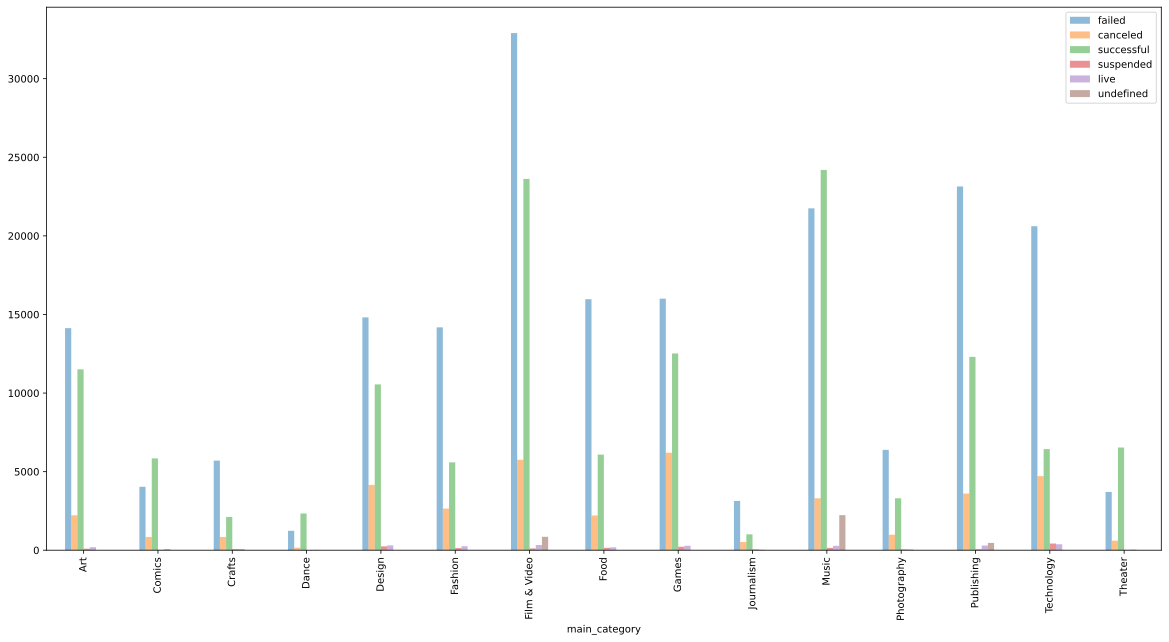

In [59]:
merged_categories.plot(kind='bar', 
             alpha=0.5, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

In [60]:
merged_categories.sort_values(by=['failed', 'canceled', 'successful', 
                                  'suspended', 'suspended', 'live', 'undefined'])
merged_categories.head()

,failed,canceled,successful,suspended,live,undefined
main_category,,,,,,
Art,14131,2222,11510,96,194,NaN
Comics,4036,842,5842,23,76,NaN
Crafts,5703,843,2115,72,76,NaN
Dance,1235,163,2338,13,18,1.0
Design,14814,4152,10550,247,305,2.0


In [61]:
merged_categories.describe()

,failed,canceled,successful,suspended,live,undefined
count,15.000000,15.000000,15.000000,15.000000,15.000000,10.000000
mean,13181.266667,2585.266667,8930.400000,123.066667,186.600000,356.200000
std,9088.471532,1974.993796,7108.582276,108.880975,126.668747,719.934997
min,1235.000000,163.000000,1012.000000,13.000000,18.000000,1.000000
25%,4869.500000,842.500000,4449.000000,53.500000,62.000000,1.000000
50%,14182.000000,2222.000000,6434.000000,96.000000,194.000000,2.500000
75%,18309.500000,3877.000000,11905.000000,151.000000,293.000000,347.250000
max,32904.000000,6202.000000,24197.000000,424.000000,377.000000,2234.000000


In [62]:
grouped_failed_stripped_total.describe()

,failed
count,15.000000
mean,13181.266667
std,9088.471532
min,1235.000000
25%,4869.500000
50%,14182.000000
75%,18309.500000
max,32904.000000


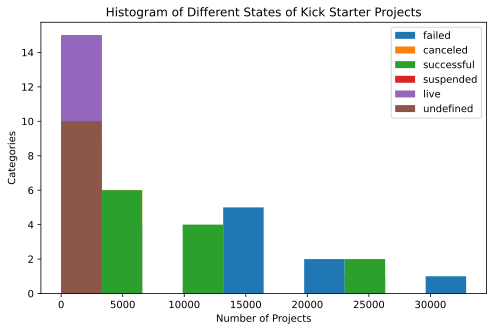

In [63]:
#grouped_failed_stripped_totaltransposed = grouped_failed_stripped_total.T 
merged_categories.plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Different States of Kick Starter Projects') # add a title to the histogram
plt.ylabel('Categories') # add y-label
plt.xlabel('Number of Projects') # add x-label

plt.show()

In [64]:
#df_data_1.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

#plt.title('Total Immigration to Canada from 1980 - 2013')
#plt.xlabel('Year')
#plt.ylabel('Number of Immigrants')

# plot line of best fit
#plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
#plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

#plt.show()

In [65]:
df_data_1.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00


In [66]:
dropped_df1 = df_data_1.drop(['ID', 'name'], axis = 1)

#refined_df = pd.concat([dropped_df1], axis=1)

In [67]:
#refined_df.head()

In [68]:
#Adding all numbers up in quantifiable column
dropped_df1_grouped=dropped_df1.groupby(['main_category']).sum()
dropped_df1_grouped.head()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
main_category,,,,,,
Art,1.149464e+09,1.015470e+08,1188200,7.134131e+07,9.068045e+07,1.103558e+09
Comics,2.190160e+08,7.464365e+07,1458090,5.781692e+07,7.151839e+07,2.117433e+08
Crafts,1.021164e+08,1.776030e+07,240342,1.038749e+07,1.438428e+07,9.191721e+07
Dance,3.889078e+07,1.390693e+07,161275,1.116158e+07,1.301070e+07,3.612882e+07
Design,1.405280e+09,8.154909e+08,7255880,5.121320e+08,7.342202e+08,1.259073e+09


In [69]:
refined_df2 = pd.concat([merged_categories, dropped_df1_grouped], axis=1)
refined_df2.head()

,failed,canceled,successful,suspended,live,undefined,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
main_category,,,,,,,,,,,,
Art,14131,2222,11510,96,194,NaN,1.149464e+09,1.015470e+08,1188200,7.134131e+07,9.068045e+07,1.103558e+09
Comics,4036,842,5842,23,76,NaN,2.190160e+08,7.464365e+07,1458090,5.781692e+07,7.151839e+07,2.117433e+08
Crafts,5703,843,2115,72,76,NaN,1.021164e+08,1.776030e+07,240342,1.038749e+07,1.438428e+07,9.191721e+07
Dance,1235,163,2338,13,18,1.0,3.889078e+07,1.390693e+07,161275,1.116158e+07,1.301070e+07,3.612882e+07
Design,14814,4152,10550,247,305,2.0,1.405280e+09,8.154909e+08,7255880,5.121320e+08,7.342202e+08,1.259073e+09


In [70]:
refined_df3=refined_df2.reset_index()

In [71]:
refined_df3.head(3)

,main_category,failed,canceled,successful,suspended,live,undefined,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
0,Art,14131,2222,11510,96,194,NaN,1.149464e+09,1.015470e+08,1188200,71341309.82,90680446.11,1.103558e+09
1,Comics,4036,842,5842,23,76,NaN,2.190160e+08,7.464365e+07,1458090,57816918.40,71518391.77,2.117433e+08
2,Crafts,5703,843,2115,72,76,NaN,1.021164e+08,1.776030e+07,240342,10387490.16,14384280.25,9.191721e+07


In [72]:
refined_df3.fillna(0, inplace = True)
refined_df3.head(3)

,main_category,failed,canceled,successful,suspended,live,undefined,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
0,Art,14131,2222,11510,96,194,0.0,1.149464e+09,1.015470e+08,1188200,71341309.82,90680446.11,1.103558e+09
1,Comics,4036,842,5842,23,76,0.0,2.190160e+08,7.464365e+07,1458090,57816918.40,71518391.77,2.117433e+08
2,Crafts,5703,843,2115,72,76,0.0,1.021164e+08,1.776030e+07,240342,10387490.16,14384280.25,9.191721e+07


<h1> Taking a look a Perectanges and Success rates of each category</h1>

In [73]:
#Looking at likelooh of success. First adding up total in each category

refined_df3['Total Projects in Each Category'] = refined_df3.failed + refined_df3.canceled + refined_df3.successful + refined_df3.suspended + refined_df3.live + refined_df3.undefined
refined_df4=refined_df3

In [74]:
refined_df4.head()

,main_category,failed,canceled,successful,suspended,live,undefined,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,Total Projects in Each Category
0,Art,14131,2222,11510,96,194,0.0,1.149464e+09,1.015470e+08,1188200,7.134131e+07,9.068045e+07,1.103558e+09,28153.0
1,Comics,4036,842,5842,23,76,0.0,2.190160e+08,7.464365e+07,1458090,5.781692e+07,7.151839e+07,2.117433e+08,10819.0
2,Crafts,5703,843,2115,72,76,0.0,1.021164e+08,1.776030e+07,240342,1.038749e+07,1.438428e+07,9.191721e+07,8809.0
3,Dance,1235,163,2338,13,18,1.0,3.889078e+07,1.390693e+07,161275,1.116158e+07,1.301070e+07,3.612882e+07,3768.0
4,Design,14814,4152,10550,247,305,2.0,1.405280e+09,8.154909e+08,7255880,5.121320e+08,7.342202e+08,1.259073e+09,30070.0


In [75]:
#new column percenatges of success

refined_df4['% Successful Projects by Category'] = (refined_df3['successful']/refined_df3['Total Projects in Each Category'])*100
refined_df4.head()

,main_category,failed,canceled,successful,suspended,live,undefined,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,Total Projects in Each Category,% Successful Projects by Category
0,Art,14131,2222,11510,96,194,0.0,1.149464e+09,1.015470e+08,1188200,7.134131e+07,9.068045e+07,1.103558e+09,28153.0,40.883742
1,Comics,4036,842,5842,23,76,0.0,2.190160e+08,7.464365e+07,1458090,5.781692e+07,7.151839e+07,2.117433e+08,10819.0,53.997597
2,Crafts,5703,843,2115,72,76,0.0,1.021164e+08,1.776030e+07,240342,1.038749e+07,1.438428e+07,9.191721e+07,8809.0,24.009536
3,Dance,1235,163,2338,13,18,1.0,3.889078e+07,1.390693e+07,161275,1.116158e+07,1.301070e+07,3.612882e+07,3768.0,62.048832
4,Design,14814,4152,10550,247,305,2.0,1.405280e+09,8.154909e+08,7255880,5.121320e+08,7.342202e+08,1.259073e+09,30070.0,35.084802


In [76]:
refined_df4.sort_values(by='% Successful Projects by Category', ascending = False, inplace = True)
refined_df4

,main_category,failed,canceled,successful,suspended,live,undefined,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,Total Projects in Each Category,% Successful Projects by Category
3,Dance,1235,163,2338,13,18,1.0,3.889078e+07,1.390693e+07,161275,1.116158e+07,1.301070e+07,3.612882e+07,3768.0,62.048832
14,Theater,3708,608,6534,21,41,1.0,3.005696e+08,4.471301e+07,513536,3.878512e+07,4.371658e+07,2.956149e+08,10913.0,59.873545
1,Comics,4036,842,5842,23,76,0.0,2.190160e+08,7.464365e+07,1458090,5.781692e+07,7.151839e+07,2.117433e+08,10819.0,53.997597
10,Music,21752,3305,24197,149,281,2234.0,8.336140e+08,2.072948e+08,2708475,1.662658e+08,2.003187e+08,7.980919e+08,51918.0,46.606187
0,Art,14131,2222,11510,96,194,0.0,1.149464e+09,1.015470e+08,1188200,7.134131e+07,9.068045e+07,1.103558e+09,28153.0,40.883742
6,Film & Video,32904,5755,23623,117,332,854.0,5.362378e+09,4.045744e+08,4197577,3.468760e+08,3.915551e+08,5.253729e+09,63585.0,37.151844
8,Games,16003,6202,12518,220,287,1.0,1.786610e+09,7.703319e+08,11336829,5.744020e+08,7.413273e+08,1.582708e+09,35231.0,35.531208
4,Design,14814,4152,10550,247,305,2.0,1.405280e+09,8.154909e+08,7255880,5.121320e+08,7.342202e+08,1.259073e+09,30070.0,35.084802
12,Publishing,23145,3602,12300,66,299,462.0,1.161588e+09,1.450902e+08,2231589,1.037139e+08,1.335760e+08,9.888050e+08,39874.0,30.847169
11,Photography,6384,986,3305,55,48,1.0,1.401619e+08,3.950123e+07,428078,3.017172e+07,3.850161e+07,1.322243e+08,10779.0,30.661471


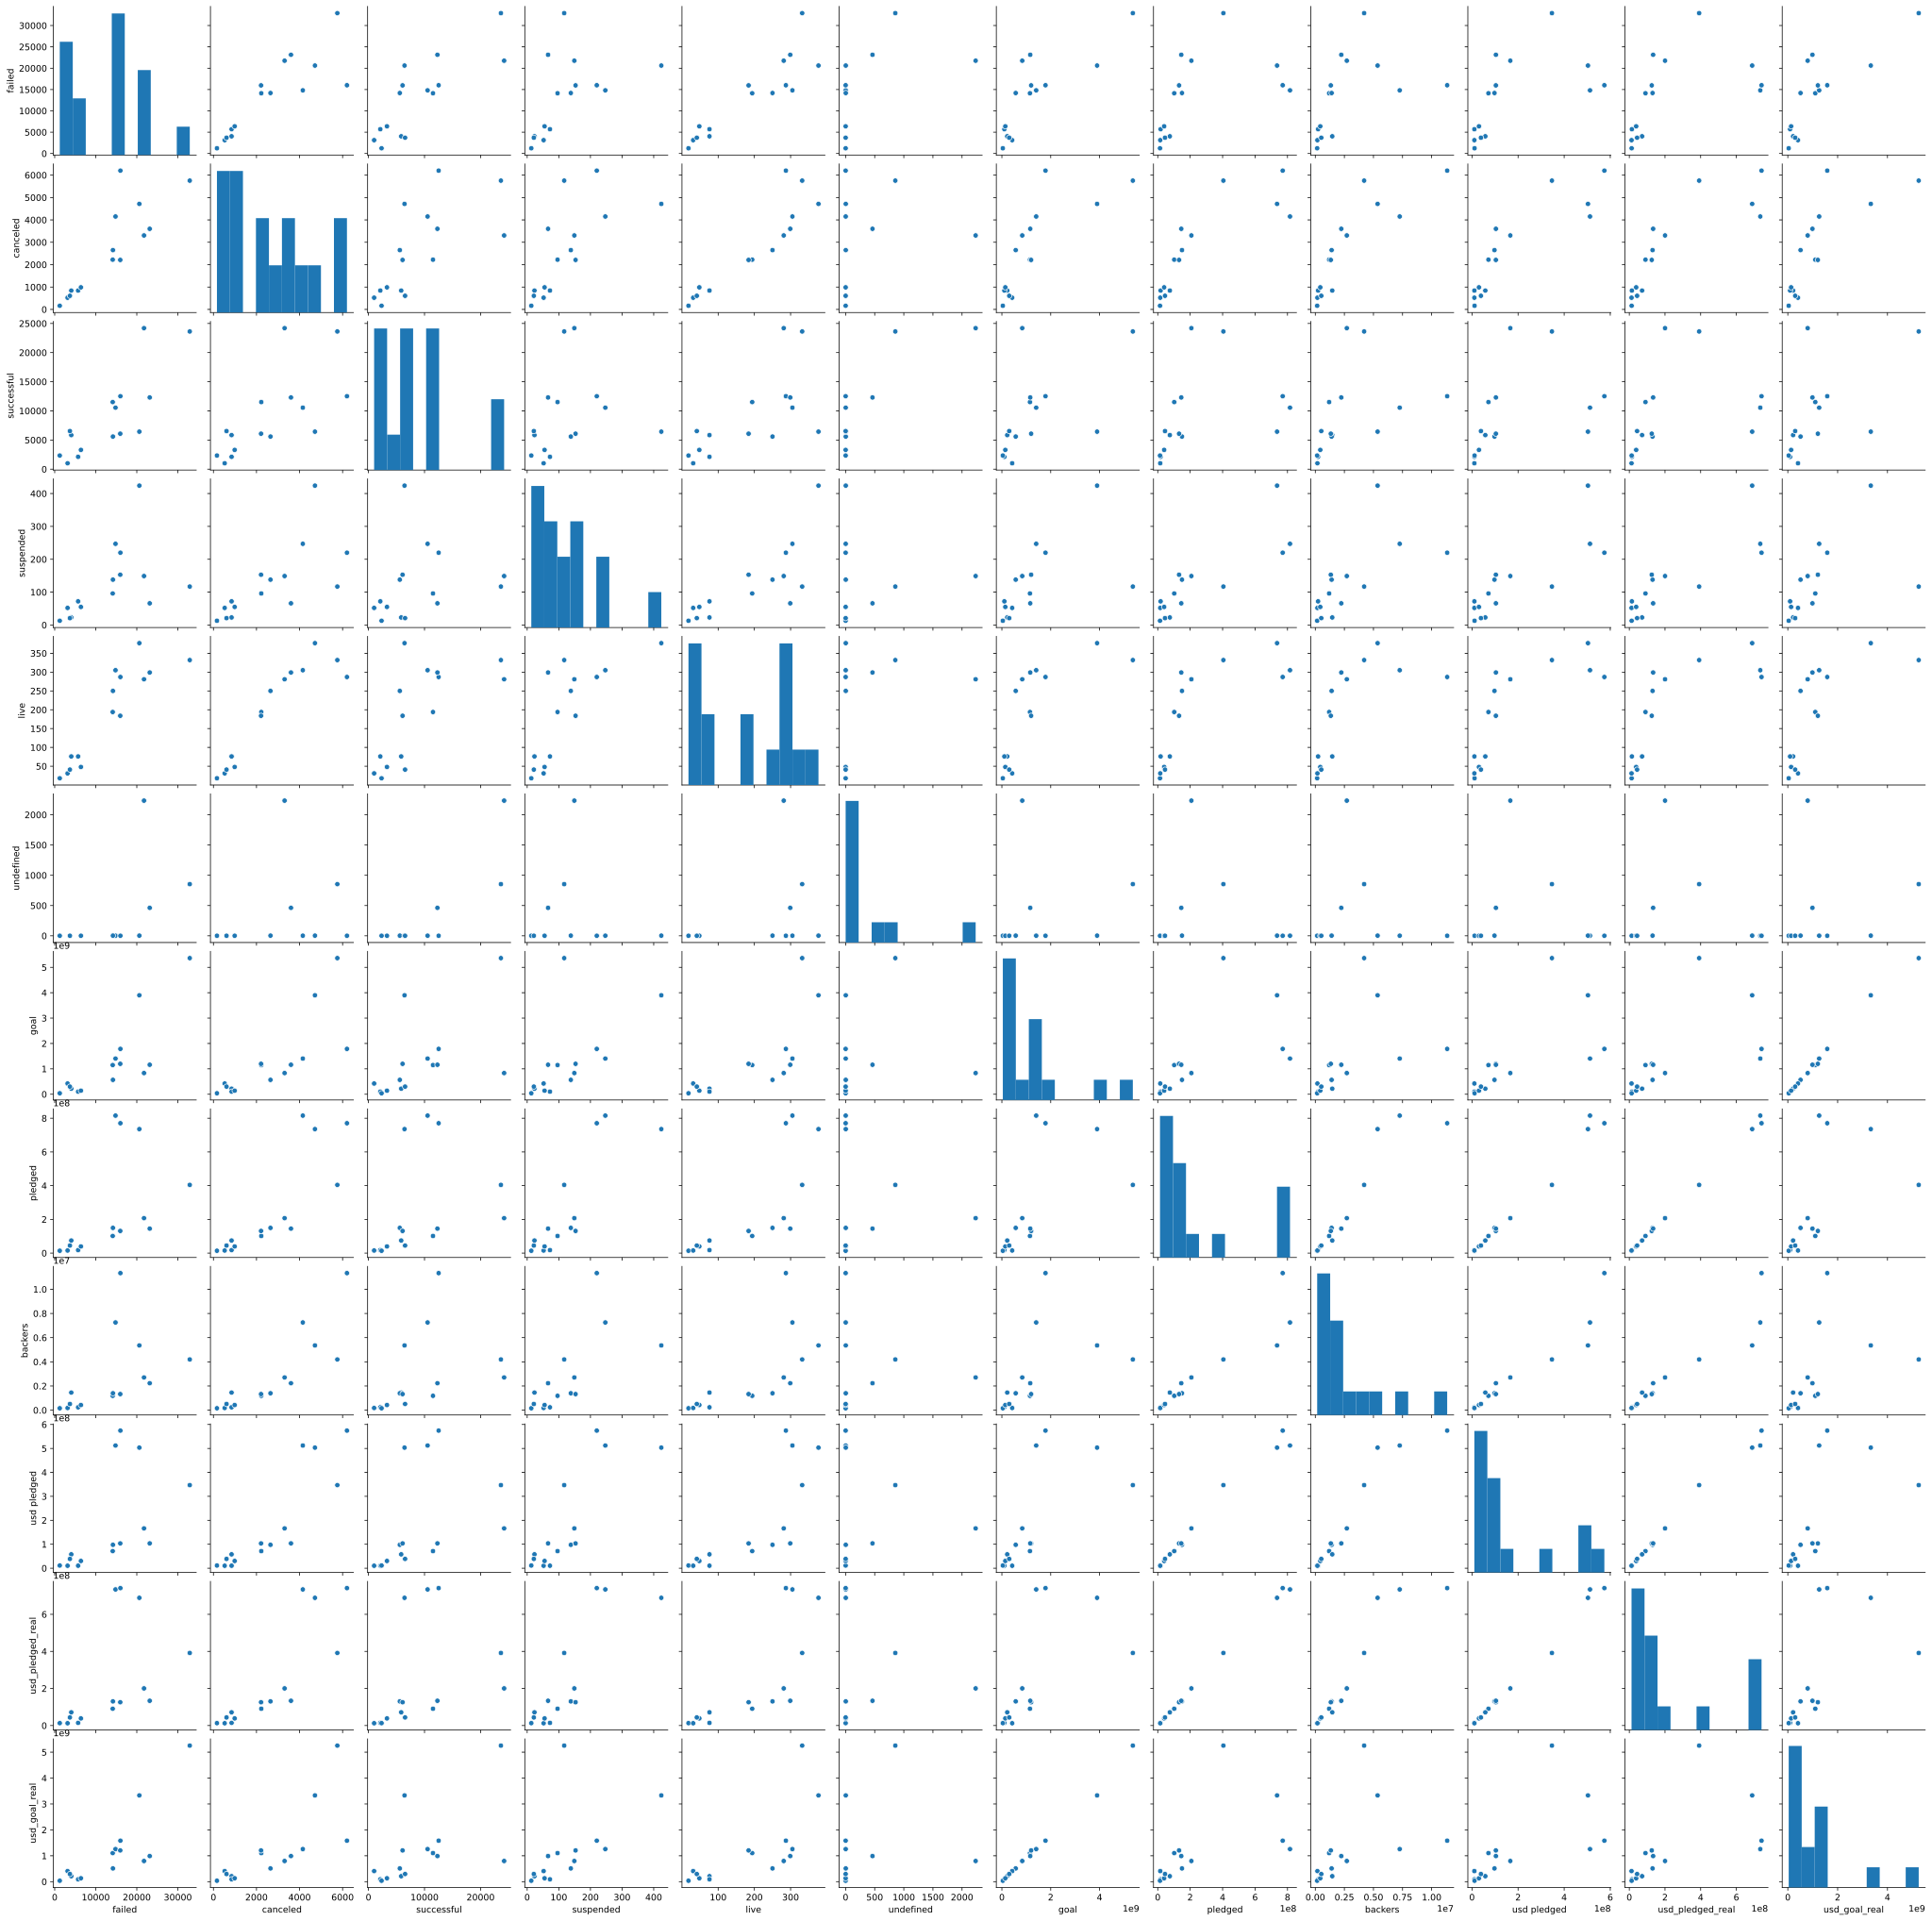

In [77]:
import seaborn as sns
sns.pairplot(refined_df2)

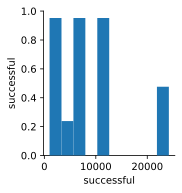

In [78]:
sns.pairplot(grouped_successful_stripped_total)

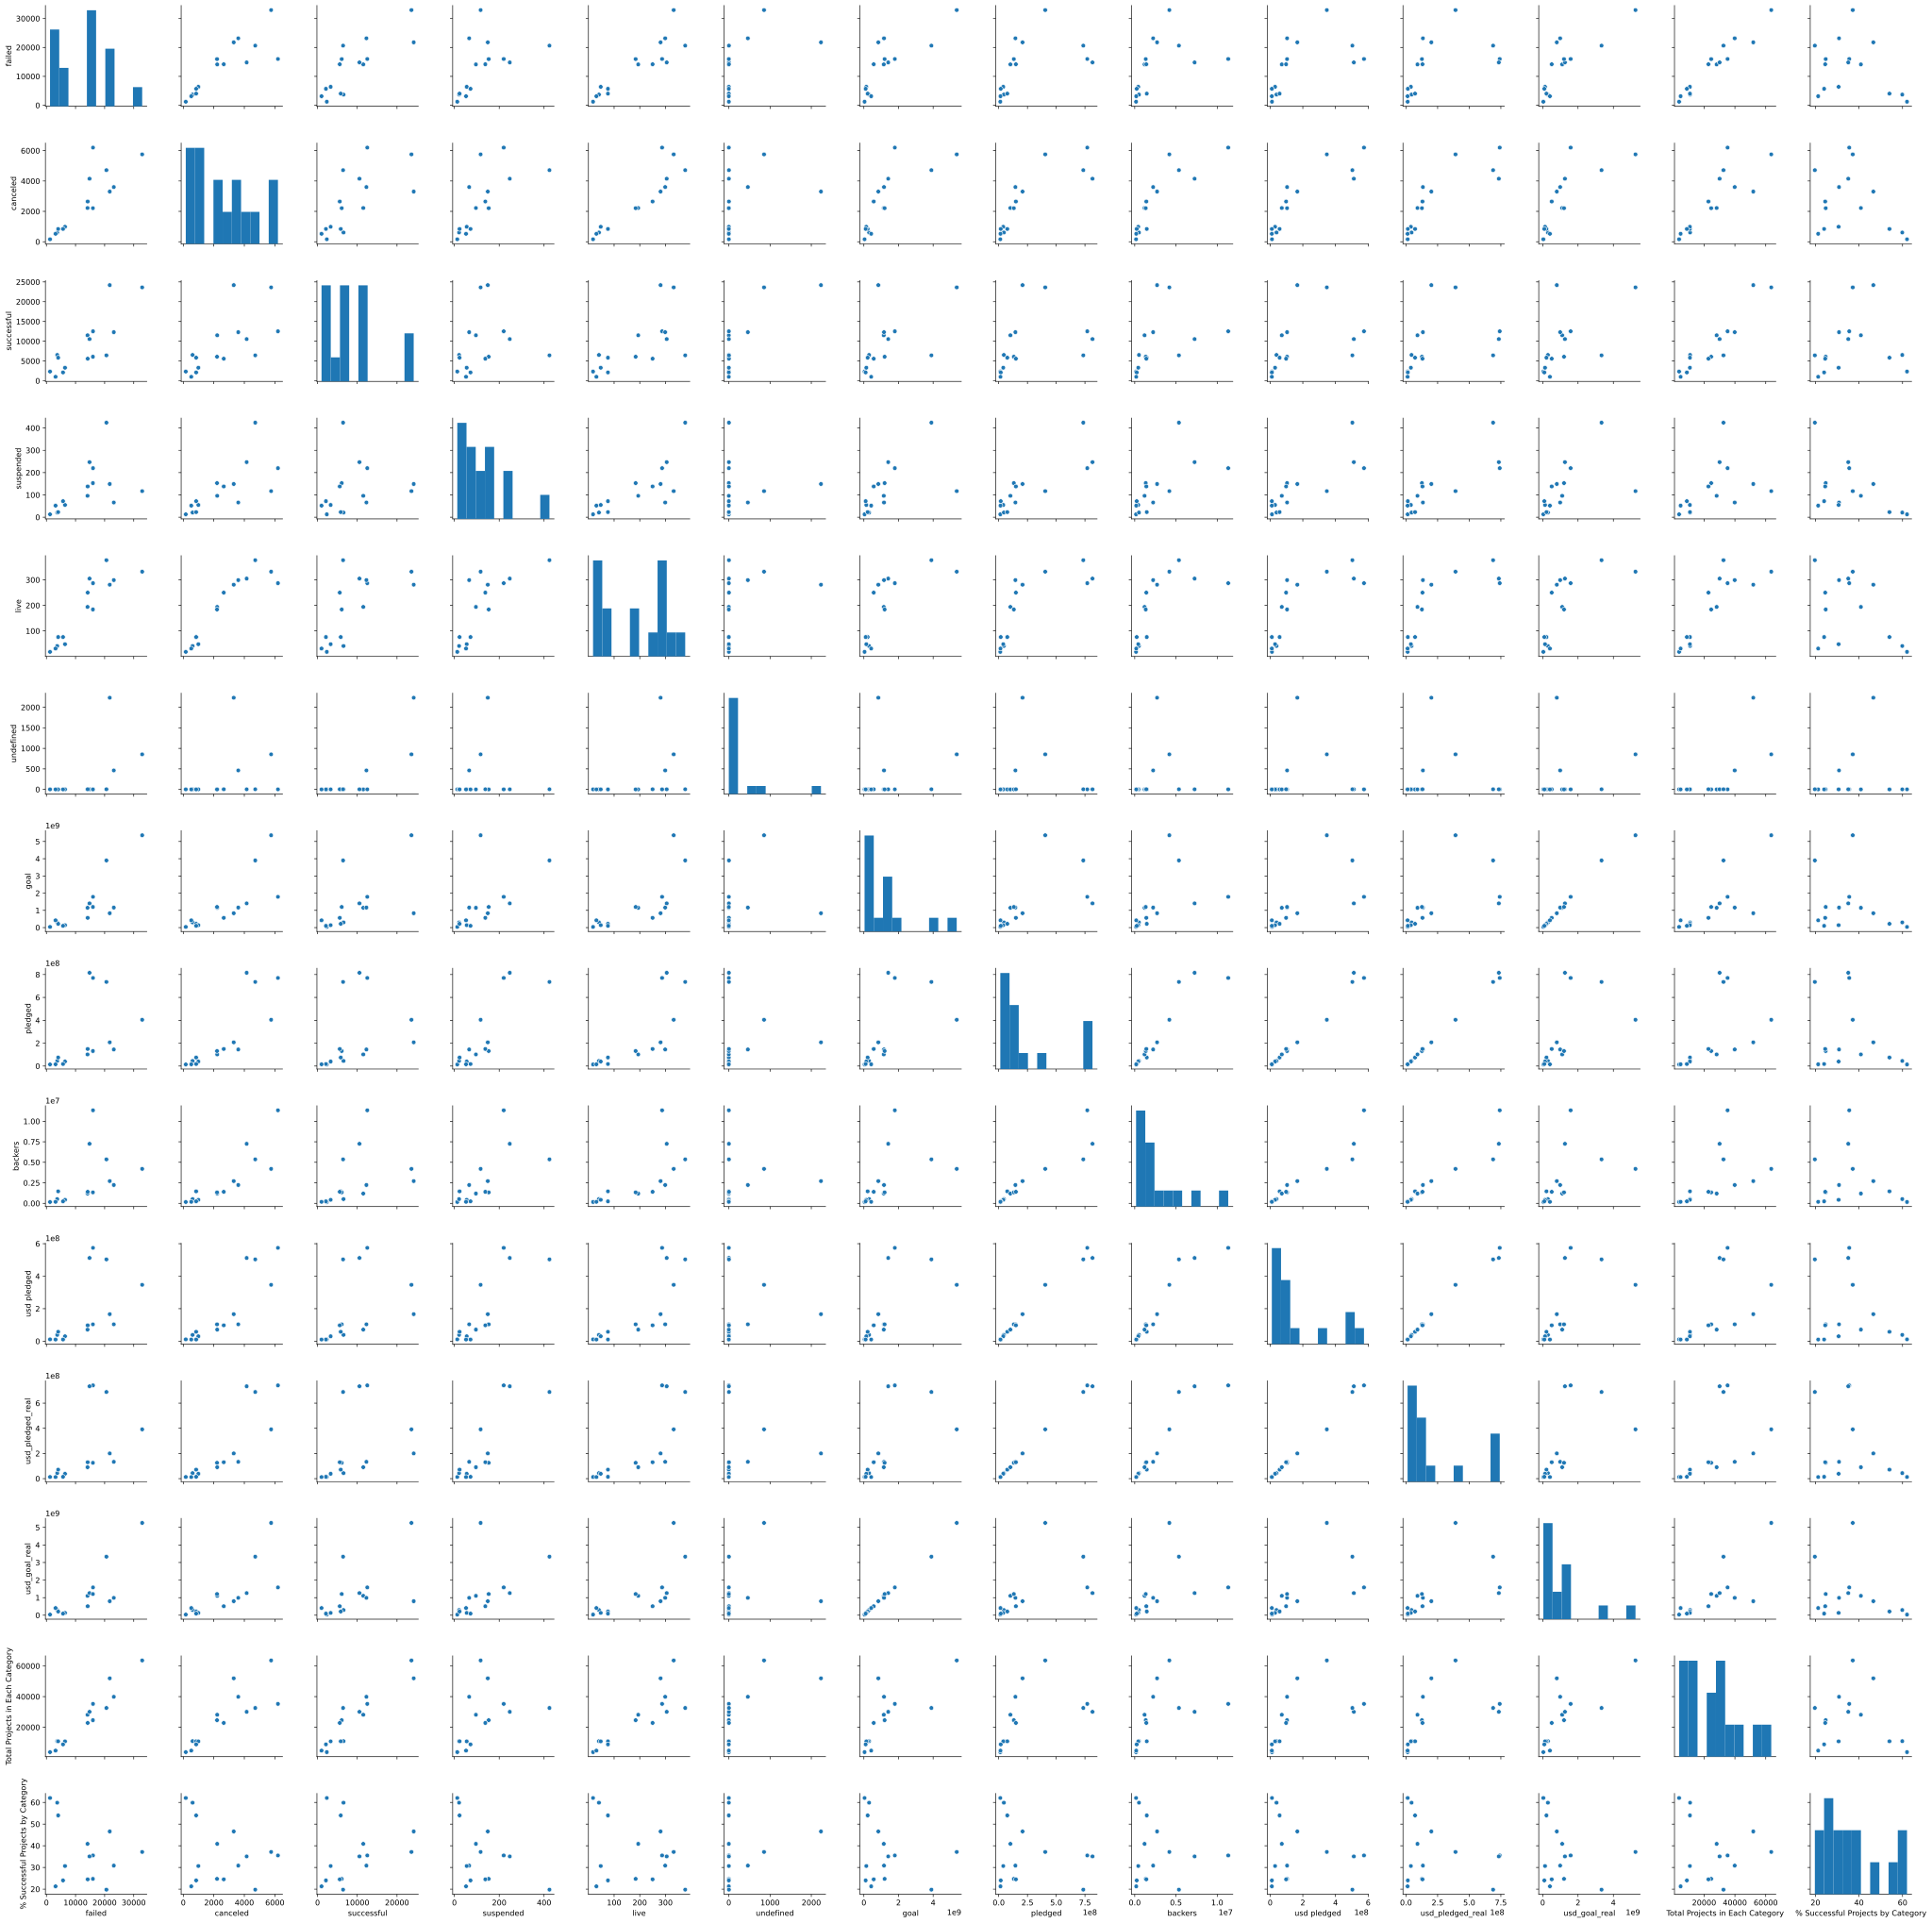

In [79]:
sns.pairplot(refined_df3)

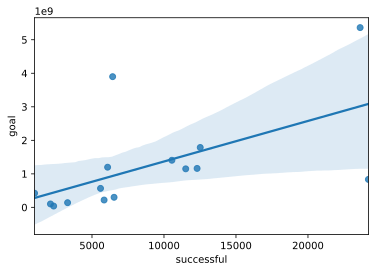

In [80]:
#refined_df3.plot(kind='scatter',x='successful',y='goal',color='red')
sns.regplot(x='successful', y='goal', data=refined_df3)

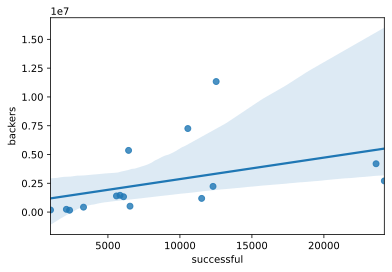

In [81]:
#refined_df3.plot(kind='scatter',x='successful',y='backers',color='red')
sns.regplot(x='successful', y='backers', data=refined_df3)

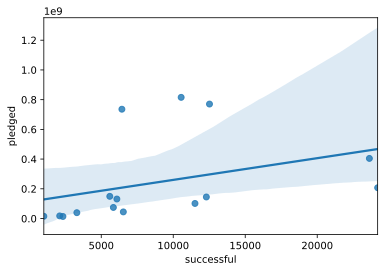

In [82]:
#refined_df3.plot(kind='scatter',x='successful',y='pledged',color='red')
sns.regplot(x='successful', y='pledged', data=refined_df3)

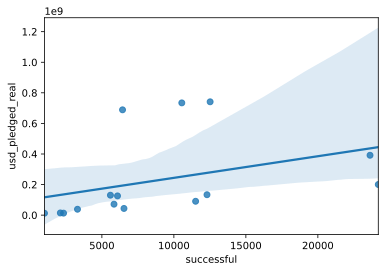

In [83]:
#refined_df3.plot(kind='scatter',x='successful',y='usd_pledged_real',color='red')
sns.regplot(x='successful', y='usd_pledged_real', data=refined_df3)

<h2> Histograms</h2>

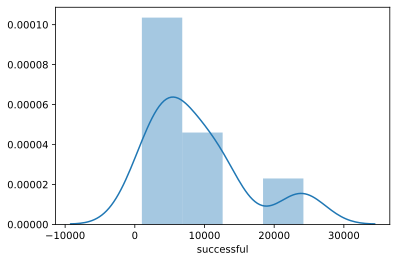

In [84]:
#refined_df3['successful'].hist()
sns.distplot(refined_df3['successful'])

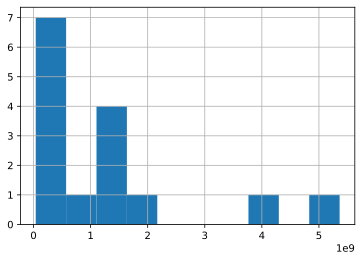

In [85]:
refined_df3['goal'].hist()

<h2> Outliers </h2>

In [86]:
#Dealing with Outliers for GOAL

#Calculate the interquartile
import numpy as np

q25, q50, q75 = np.percentile(refined_df3['goal'], [25, 50, 75])
iqr = q75-q25

#Calculate the min/max limits to be considered outlier
min = q25-1.5*(iqr)
max = q25+1.5*(iqr)

print(min, q25, q50, q75, max)

-1302950808.765 259792812.45000002 833613962.4700005 1301621893.2600002 1822536433.6650002


In [87]:
#Identify points
[x for x in refined_df3['goal'] if x > max]

[5362378004.6799965, 3898910445.1999993]

In [88]:
#Dealing with Outliers for FAILED

#Calculate the interquartile
import numpy as np

q25, q50, q75 = np.percentile(refined_df3['successful'], [25, 50, 75])
iqr = q75-q25

#Calculate the min/max limits to be considered outlier
min = q25-1.5*(iqr)
max = q25+1.5*(iqr)

print(min, q25, q50, q75, max)

-6735.0 4449.0 6434.0 11905.0 15633.0


In [89]:
#Identify points
[x for x in refined_df3['successful'] if x > max]

[24197, 23623]

<h2> Fixing Outliers and Skews </h2>

In [90]:
num_cols=refined_df3.select_dtypes('number').columns

In [91]:
refined_df4=refined_df3.loc[refined_df3['successful'] <= 23000, :]
print('Number of rows in the data: ', refined_df4.shape[0])
print('Number of columns in the data: ', refined_df4.shape[1])


Number of rows in the data:  13
Number of columns in the data:  15


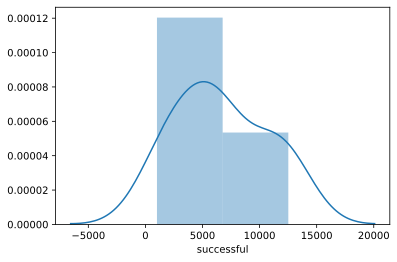

In [92]:
ax=sns.distplot(refined_df4['successful'], kde = 3)


In [93]:
skew_limit = 0.75 #skew limit
skew_vals = refined_df3[num_cols].skew()

In [94]:
skew_vals

failed                               0.514500
canceled                             0.519904
successful                           1.247970
suspended                            1.641126
live                                -0.075027
undefined                            3.026793
goal                                 1.990452
pledged                              1.297809
backers                              1.793493
usd pledged                          1.180342
usd_pledged_real                     1.274204
usd_goal_real                        2.165920
Total Projects in Each Category      0.720600
% Successful Projects by Category    0.707089
dtype: float64

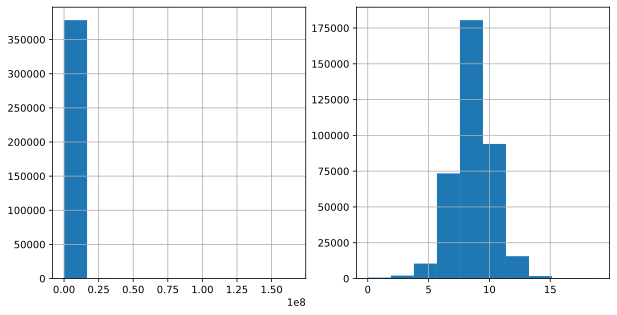

In [95]:
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
df["usd_goal_real"].hist(ax=ax_before)
df["usd_goal_real"].apply(np.log1p).hist(ax=ax_after)

In [96]:
skew_cols = skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending=False)
skew_cols

undefined           3.026793
usd_goal_real       2.165920
goal                1.990452
backers             1.793493
suspended           1.641126
pledged             1.297809
usd_pledged_real    1.274204
successful          1.247970
usd pledged         1.180342
dtype: float64

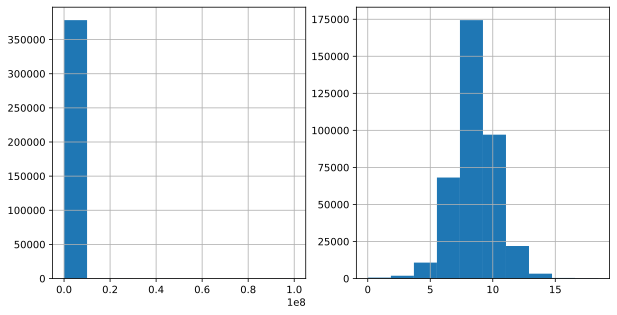

In [97]:
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
df["goal"].hist(ax=ax_before)
df["goal"].apply(np.log1p).hist(ax=ax_after)

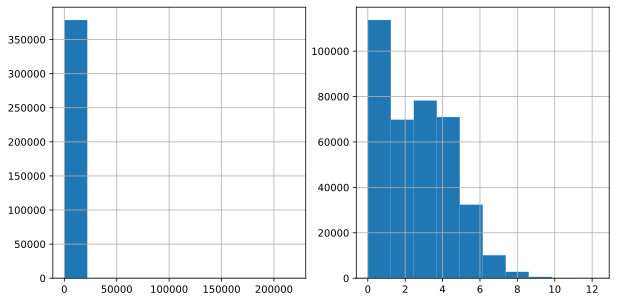

In [98]:
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
df["backers"].hist(ax=ax_before)
df["backers"].apply(np.log1p).hist(ax=ax_after)

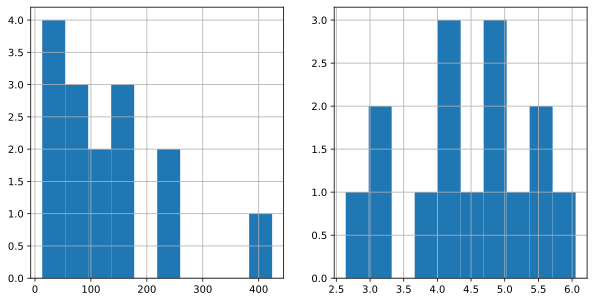

In [99]:
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
refined_df3["suspended"].hist(ax=ax_before)
refined_df3["suspended"].apply(np.log1p).hist(ax=ax_after)

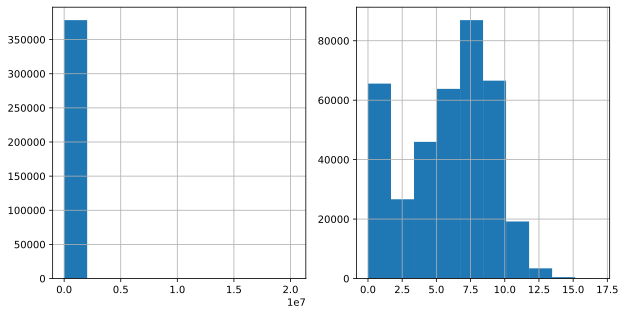

In [100]:
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
df["pledged"].hist(ax=ax_before)
df["pledged"].apply(np.log1p).hist(ax=ax_after)

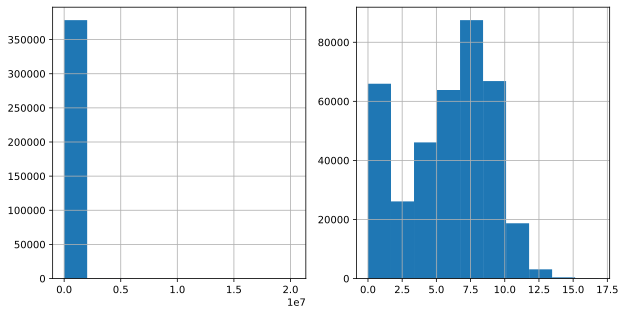

In [101]:
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
df["usd_pledged_real"].hist(ax=ax_before)
df["usd_pledged_real"].apply(np.log1p).hist(ax=ax_after)

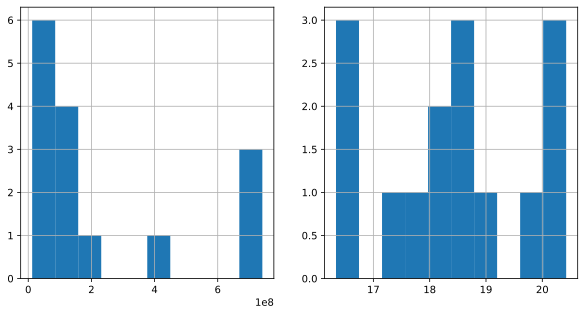

In [102]:
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
refined_df3["usd_pledged_real"].hist(ax=ax_before)
refined_df3["usd_pledged_real"].apply(np.log1p).hist(ax=ax_after)

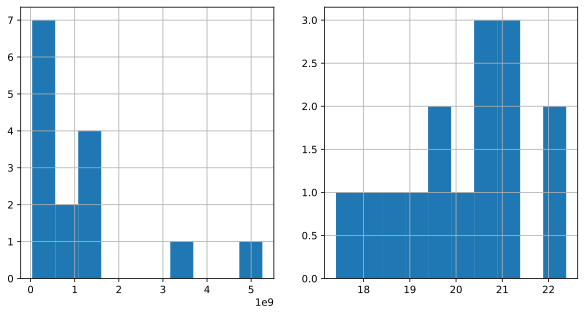

In [103]:
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
refined_df3["usd_goal_real"].hist(ax=ax_before)
refined_df3["usd_goal_real"].apply(np.log1p).hist(ax=ax_after)

In [104]:
refined_df3.isnull()

,main_category,failed,canceled,successful,suspended,live,undefined,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,Total Projects in Each Category,% Successful Projects by Category
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


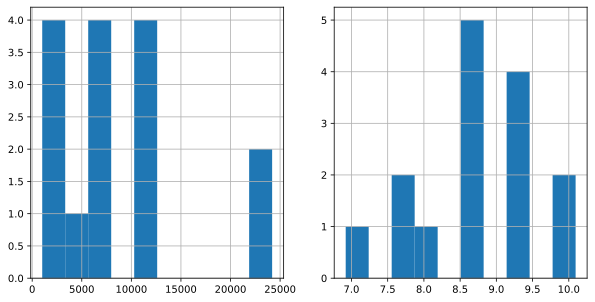

In [105]:
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
refined_df3["successful"].hist(ax=ax_before)
refined_df3["successful"].apply(np.log1p).hist(ax=ax_after)

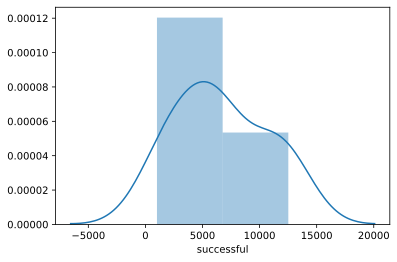

In [106]:
ax=sns.distplot(refined_df4['successful'], kde = 10)

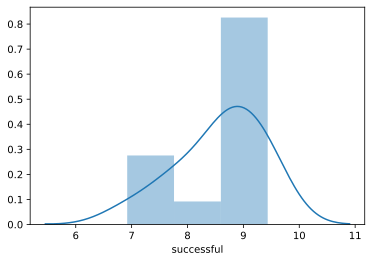

In [107]:

ax=sns.distplot(refined_df4['successful'].apply(np.log1p), kde = 0.05)


In [108]:
#sns.pairplot(df_data_1, plot_kws=dict(alpha=1, edgecolor='none'))


<h1>Feauture Engineering</h1>

In [109]:
X = refined_df3[['goal', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'Total Projects in Each Category']]
Y = refined_df3['successful']

In [110]:
pd.get_dummies(refined_df3)

,failed,canceled,successful,suspended,live,undefined,goal,pledged,backers,usd pledged,...,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater
3,1235,163,2338,13,18,1.0,3.889078e+07,1.390693e+07,161275,1.116158e+07,...,0,0,0,0,0,0,0,0,0,0
14,3708,608,6534,21,41,1.0,3.005696e+08,4.471301e+07,513536,3.878512e+07,...,0,0,0,0,0,0,0,0,0,1
1,4036,842,5842,23,76,0.0,2.190160e+08,7.464365e+07,1458090,5.781692e+07,...,0,0,0,0,0,0,0,0,0,0
10,21752,3305,24197,149,281,2234.0,8.336140e+08,2.072948e+08,2708475,1.662658e+08,...,0,0,0,0,0,1,0,0,0,0
0,14131,2222,11510,96,194,0.0,1.149464e+09,1.015470e+08,1188200,7.134131e+07,...,0,0,0,0,0,0,0,0,0,0
6,32904,5755,23623,117,332,854.0,5.362378e+09,4.045744e+08,4197577,3.468760e+08,...,0,1,0,0,0,0,0,0,0,0
8,16003,6202,12518,220,287,1.0,1.786610e+09,7.703319e+08,11336829,5.744020e+08,...,0,0,0,1,0,0,0,0,0,0
4,14814,4152,10550,247,305,2.0,1.405280e+09,8.154909e+08,7255880,5.121320e+08,...,0,0,0,0,0,0,0,0,0,0
12,23145,3602,12300,66,299,462.0,1.161588e+09,1.450902e+08,2231589,1.037139e+08,...,0,0,0,0,0,0,0,1,0,0
11,6384,986,3305,55,48,1.0,1.401619e+08,3.950123e+07,428078,3.017172e+07,...,0,0,0,0,0,0,1,0,0,0


In [111]:
df_data_1

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [112]:
df_data_2 = df_data_1.drop(['ID', 'main_category', 'deadline'], axis=1)

In [113]:
df_data_2

,name,category,currency,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,GBP,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,USD,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,Where is Hank?,Narrative Film,USD,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,USD,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,USD,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,The Tribe,Narrative Film,USD,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,USD,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,BioDefense Education Kit,Technology,USD,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [114]:
df_data_3 = df_data_2.sample(frac=0.006, random_state=1)
df_data_3

,name,category,currency,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
99838,2018 Comic Con/ Horror Con/ GMCC,Art,USD,600.0,2017-08-31 04:05:27,600.00,successful,4,US,100.00,600.00,600.00
15731,Ixion's The Four Disgracers,Theater,USD,3500.0,2014-03-27 20:21:23,2920.00,failed,54,US,2920.00,2920.00,3500.00
339459,Irving Comics Inc. (Canceled),Comics,USD,10000.0,2015-03-17 20:58:34,75.00,canceled,1,US,75.00,75.00,10000.00
100211,Breakaway,Shorts,USD,5000.0,2011-09-16 20:11:50,5365.00,successful,60,US,5365.00,5365.00,5000.00
170820,the Atomic Café Mobile,Drinks,USD,5000.0,2015-05-20 10:47:52,5111.06,successful,53,US,5111.06,5111.06,5000.00
...,...,...,...,...,...,...,...,...,...,...,...,...
154190,High Resolution Texture Assets & Texture Sheet...,Video Games,GBP,5000.0,2013-05-01 00:45:31,0.00,canceled,0,GB,0.00,0.00,7549.45
40778,Magic of the Trees (Canceled),Children's Books,USD,2000.0,2013-05-31 03:04:08,26.00,canceled,2,US,26.00,26.00,2000.00
56557,I Close My Eyes,Art,USD,4000.0,2017-01-17 19:54:19,0.00,failed,0,US,0.00,0.00,4000.00
28323,The Last Revel - Releasing a New Album,Country & Folk,USD,7000.0,2015-01-27 23:37:46,7520.00,successful,109,US,7520.00,7520.00,7000.00


In [254]:
df_data_3.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,2.272000e+03,2.272000e+03,2272.000000,2251.000000,2272.000000,2.272000e+03
mean,4.346927e+04,9.775884e+03,103.113116,6037.304522,7870.484925,4.162042e+04
std,4.645500e+05,9.108477e+04,432.700609,26161.452611,32417.372349,4.633370e+05
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,2.000000e+03,4.075000e+01,2.000000,19.450000,40.000000,2.000000e+03
50%,5.000000e+03,7.270000e+02,13.000000,435.000000,714.585000,5.109905e+03
75%,1.592500e+04,4.547750e+03,61.250000,3211.000000,4510.000000,1.507250e+04
max,2.000000e+07,4.075739e+06,8211.000000,604978.940000,604978.940000,2.000000e+07


In [115]:
pd.get_dummies(df_data_3)

,goal,launched,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,name_! Bring Odessa a Comic Book/ Book Shop!,"name_"" citrus greening and the transgenic orange a film ""","name_""'Twas the Night..."" An afternoon of a cappella music",...,country_IT,country_JP,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
99838,600.0,2017-08-31 04:05:27,600.00,4,100.00,600.00,600.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15731,3500.0,2014-03-27 20:21:23,2920.00,54,2920.00,2920.00,3500.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
339459,10000.0,2015-03-17 20:58:34,75.00,1,75.00,75.00,10000.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100211,5000.0,2011-09-16 20:11:50,5365.00,60,5365.00,5365.00,5000.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
170820,5000.0,2015-05-20 10:47:52,5111.06,53,5111.06,5111.06,5000.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154190,5000.0,2013-05-01 00:45:31,0.00,0,0.00,0.00,7549.45,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40778,2000.0,2013-05-31 03:04:08,26.00,2,26.00,26.00,2000.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
56557,4000.0,2017-01-17 19:54:19,0.00,0,0.00,0.00,4000.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28323,7000.0,2015-01-27 23:37:46,7520.00,109,7520.00,7520.00,7000.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [116]:
pd.get_dummies(refined_df3)

,failed,canceled,successful,suspended,live,undefined,goal,pledged,backers,usd pledged,...,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater
3,1235,163,2338,13,18,1.0,3.889078e+07,1.390693e+07,161275,1.116158e+07,...,0,0,0,0,0,0,0,0,0,0
14,3708,608,6534,21,41,1.0,3.005696e+08,4.471301e+07,513536,3.878512e+07,...,0,0,0,0,0,0,0,0,0,1
1,4036,842,5842,23,76,0.0,2.190160e+08,7.464365e+07,1458090,5.781692e+07,...,0,0,0,0,0,0,0,0,0,0
10,21752,3305,24197,149,281,2234.0,8.336140e+08,2.072948e+08,2708475,1.662658e+08,...,0,0,0,0,0,1,0,0,0,0
0,14131,2222,11510,96,194,0.0,1.149464e+09,1.015470e+08,1188200,7.134131e+07,...,0,0,0,0,0,0,0,0,0,0
6,32904,5755,23623,117,332,854.0,5.362378e+09,4.045744e+08,4197577,3.468760e+08,...,0,1,0,0,0,0,0,0,0,0
8,16003,6202,12518,220,287,1.0,1.786610e+09,7.703319e+08,11336829,5.744020e+08,...,0,0,0,1,0,0,0,0,0,0
4,14814,4152,10550,247,305,2.0,1.405280e+09,8.154909e+08,7255880,5.121320e+08,...,0,0,0,0,0,0,0,0,0,0
12,23145,3602,12300,66,299,462.0,1.161588e+09,1.450902e+08,2231589,1.037139e+08,...,0,0,0,0,0,0,0,1,0,0
11,6384,986,3305,55,48,1.0,1.401619e+08,3.950123e+07,428078,3.017172e+07,...,0,0,0,0,0,0,1,0,0,0


In [117]:
#sns.pairplot(df_data_3)
refined_df3

,main_category,failed,canceled,successful,suspended,live,undefined,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,Total Projects in Each Category,% Successful Projects by Category
3,Dance,1235,163,2338,13,18,1.0,3.889078e+07,1.390693e+07,161275,1.116158e+07,1.301070e+07,3.612882e+07,3768.0,62.048832
14,Theater,3708,608,6534,21,41,1.0,3.005696e+08,4.471301e+07,513536,3.878512e+07,4.371658e+07,2.956149e+08,10913.0,59.873545
1,Comics,4036,842,5842,23,76,0.0,2.190160e+08,7.464365e+07,1458090,5.781692e+07,7.151839e+07,2.117433e+08,10819.0,53.997597
10,Music,21752,3305,24197,149,281,2234.0,8.336140e+08,2.072948e+08,2708475,1.662658e+08,2.003187e+08,7.980919e+08,51918.0,46.606187
0,Art,14131,2222,11510,96,194,0.0,1.149464e+09,1.015470e+08,1188200,7.134131e+07,9.068045e+07,1.103558e+09,28153.0,40.883742
6,Film & Video,32904,5755,23623,117,332,854.0,5.362378e+09,4.045744e+08,4197577,3.468760e+08,3.915551e+08,5.253729e+09,63585.0,37.151844
8,Games,16003,6202,12518,220,287,1.0,1.786610e+09,7.703319e+08,11336829,5.744020e+08,7.413273e+08,1.582708e+09,35231.0,35.531208
4,Design,14814,4152,10550,247,305,2.0,1.405280e+09,8.154909e+08,7255880,5.121320e+08,7.342202e+08,1.259073e+09,30070.0,35.084802
12,Publishing,23145,3602,12300,66,299,462.0,1.161588e+09,1.450902e+08,2231589,1.037139e+08,1.335760e+08,9.888050e+08,39874.0,30.847169
11,Photography,6384,986,3305,55,48,1.0,1.401619e+08,3.950123e+07,428078,3.017172e+07,3.850161e+07,1.322243e+08,10779.0,30.661471


In [249]:
first_column = refined_df3.pop('% Successful Projects by Category')
cccc=refined_df3.insert(7, '% Successful Projects by Category', first_column)
refined_df3

,main_category,failed,canceled,successful,suspended,live,undefined,% Successful Projects by Category,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,Total Projects in Each Category
0,Dance,1235,163,2338,13,18,1.0,62.048832,3.889078e+07,1.390693e+07,161275,1.116158e+07,1.301070e+07,3.612882e+07,3768.0
1,Theater,3708,608,6534,21,41,1.0,59.873545,3.005696e+08,4.471301e+07,513536,3.878512e+07,4.371658e+07,2.956149e+08,10913.0
2,Comics,4036,842,5842,23,76,0.0,53.997597,2.190160e+08,7.464365e+07,1458090,5.781692e+07,7.151839e+07,2.117433e+08,10819.0
3,Music,21752,3305,24197,149,281,2234.0,46.606187,8.336140e+08,2.072948e+08,2708475,1.662658e+08,2.003187e+08,7.980919e+08,51918.0
4,Art,14131,2222,11510,96,194,0.0,40.883742,1.149464e+09,1.015470e+08,1188200,7.134131e+07,9.068045e+07,1.103558e+09,28153.0
5,Film & Video,32904,5755,23623,117,332,854.0,37.151844,5.362378e+09,4.045744e+08,4197577,3.468760e+08,3.915551e+08,5.253729e+09,63585.0
6,Games,16003,6202,12518,220,287,1.0,35.531208,1.786610e+09,7.703319e+08,11336829,5.744020e+08,7.413273e+08,1.582708e+09,35231.0
7,Design,14814,4152,10550,247,305,2.0,35.084802,1.405280e+09,8.154909e+08,7255880,5.121320e+08,7.342202e+08,1.259073e+09,30070.0
8,Publishing,23145,3602,12300,66,299,462.0,30.847169,1.161588e+09,1.450902e+08,2231589,1.037139e+08,1.335760e+08,9.888050e+08,39874.0
9,Photography,6384,986,3305,55,48,1.0,30.661471,1.401619e+08,3.950123e+07,428078,3.017172e+07,3.850161e+07,1.322243e+08,10779.0


In [250]:
refined_df3_pichart=refined_df3.set_index('main_category')

In [251]:
refined_df3_pichart

,failed,canceled,successful,suspended,live,undefined,% Successful Projects by Category,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,Total Projects in Each Category
main_category,,,,,,,,,,,,,,
Dance,1235,163,2338,13,18,1.0,62.048832,3.889078e+07,1.390693e+07,161275,1.116158e+07,1.301070e+07,3.612882e+07,3768.0
Theater,3708,608,6534,21,41,1.0,59.873545,3.005696e+08,4.471301e+07,513536,3.878512e+07,4.371658e+07,2.956149e+08,10913.0
Comics,4036,842,5842,23,76,0.0,53.997597,2.190160e+08,7.464365e+07,1458090,5.781692e+07,7.151839e+07,2.117433e+08,10819.0
Music,21752,3305,24197,149,281,2234.0,46.606187,8.336140e+08,2.072948e+08,2708475,1.662658e+08,2.003187e+08,7.980919e+08,51918.0
Art,14131,2222,11510,96,194,0.0,40.883742,1.149464e+09,1.015470e+08,1188200,7.134131e+07,9.068045e+07,1.103558e+09,28153.0
Film & Video,32904,5755,23623,117,332,854.0,37.151844,5.362378e+09,4.045744e+08,4197577,3.468760e+08,3.915551e+08,5.253729e+09,63585.0
Games,16003,6202,12518,220,287,1.0,35.531208,1.786610e+09,7.703319e+08,11336829,5.744020e+08,7.413273e+08,1.582708e+09,35231.0
Design,14814,4152,10550,247,305,2.0,35.084802,1.405280e+09,8.154909e+08,7255880,5.121320e+08,7.342202e+08,1.259073e+09,30070.0
Publishing,23145,3602,12300,66,299,462.0,30.847169,1.161588e+09,1.450902e+08,2231589,1.037139e+08,1.335760e+08,9.888050e+08,39874.0


In [252]:
refined_df3_pichart['% Successful Projects by Category']

main_category
Dance           62.048832
Theater         59.873545
Comics          53.997597
Music           46.606187
Art             40.883742
Film & Video    37.151844
Games           35.531208
Design          35.084802
Publishing      30.847169
Photography     30.661471
Food            24.733761
Fashion         24.513499
Crafts          24.009536
Journalism      21.282860
Technology      19.754982
Name: % Successful Projects by Category, dtype: float64

In [253]:
import matplotlib.pyplot as plt
import numpy as np


plt=refined_df3_pichart.plot.pie(y='successful', figsize=(5, 5))

values = refined_df3_pichart['% Successful Projects by Category']
colors = ['#10825A', '#821078', '#22CACC', '#89CC22', '#CC8922', '#6022CC', '#223CCC', '#229BCC', '#22CC6D', '#CC5022', '#7D5A5A', '#BBC2EC', '#E9BBEC', '#ECC6BB', '#BBECC2' ]
explode = (0.2, 0.2, 0.2, 0.2, 0, 0)

plt.pie(values, colors=colors, explode=None, autopct='%1.1f%%', counterclock=False, shadow=True, labels = None)
plt.legend(title = 'categories', bbox_to_anchor=(1.7, 1)




SyntaxError: unexpected EOF while parsing (<ipython-input-253-03b99ac09a77>, line 14)

<h2>Polynomial Features</h2>

In [118]:
from sklearn.preprocessing import PolynomialFeatures

In [119]:
pf = PolynomialFeatures(degree=2)

In [120]:
X = refined_df3.drop(['main_category', 'failed', 'canceled', 'successful', 'suspended', 'live', 'undefined'], axis=1)
Y = refined_df3['successful']

In [121]:
features = ['']

<h1>Hypothesis Testing</h2>

In [122]:
from scipy.stats import binom
print(binom.ppf(0.95, 100, 0.5)+1)

59.0


In [123]:
prob = 1-binom.cdf(59, 100, 0.5)
print(str(round(prob*100, 1))+'%')

2.8%


In [124]:
df_data_1['main_category']

0           Publishing
1         Film & Video
2         Film & Video
3                Music
4         Film & Video
              ...     
378656    Film & Video
378657    Film & Video
378658    Film & Video
378659      Technology
378660             Art
Name: main_category, Length: 378661, dtype: object

In [125]:
filt_cols_dance=df_data_1[df_data_1['main_category'].str.contains('Dance')]
filt_cols_dance

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
122,100051531,Cat - Pre-Professional Ballerina,Dance,Dance,USD,2014-10-06,3400.0,2014-08-07 13:24:34,0.0,failed,0,US,0.00,0.00,3400.00
233,1001020080,Wood Floor Fundraiser,Dance,Dance,USD,2015-08-16,1200.0,2015-08-11 17:13:30,1205.0,successful,21,US,1205.00,1205.00,1200.00
253,1001126692,Pole Diversity: A Showcase of Acrobatic Dance ...,Performances,Dance,USD,2015-09-19,450.0,2015-08-19 21:02:03,160.0,failed,4,US,160.00,160.00,450.00
264,1001159174,Fooju Dance Collaborative,Performances,Dance,USD,2014-12-21,1500.0,2014-11-21 08:02:19,1900.0,successful,47,US,1900.00,1900.00,1500.00
350,1001575705,Tall Tales: An evening of dance with ChoreoJoey,Performances,Dance,USD,2016-08-07,3000.0,2016-07-21 05:18:26,5.0,failed,1,US,0.00,5.00,3000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378364,998562376,FORBIDDEN FRUIT. New creation - socially criti...,Dance,Dance,GBP,2013-12-10,10000.0,2013-11-05 09:59:28,571.0,failed,22,GB,909.97,929.01,16269.95
378458,998981870,"""Lyric Suite"" for RDTE",Dance,Dance,USD,2012-02-10,1500.0,2012-01-31 18:07:19,646.0,failed,12,US,646.00,646.00,1500.00
378502,999191096,Creating the Bon Bon Dance space for #heARTdan...,Spaces,Dance,USD,2014-01-03,15000.0,2013-12-04 04:23:15,18443.0,successful,121,US,18443.00,18443.00,15000.00
378610,999741441,CORPOREAL,Dance,Dance,USD,2013-05-15,500.0,2013-04-25 01:59:29,505.0,successful,14,US,505.00,505.00,500.00


In [126]:
#ax4=sns.distplot(filt_cols_dance, kde = 0.05)

In [127]:
filt_cols_dance2=df_data_1[df_data_1['main_category'].str.contains('Dance')]
filt_cols_dance2

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
122,100051531,Cat - Pre-Professional Ballerina,Dance,Dance,USD,2014-10-06,3400.0,2014-08-07 13:24:34,0.0,failed,0,US,0.00,0.00,3400.00
233,1001020080,Wood Floor Fundraiser,Dance,Dance,USD,2015-08-16,1200.0,2015-08-11 17:13:30,1205.0,successful,21,US,1205.00,1205.00,1200.00
253,1001126692,Pole Diversity: A Showcase of Acrobatic Dance ...,Performances,Dance,USD,2015-09-19,450.0,2015-08-19 21:02:03,160.0,failed,4,US,160.00,160.00,450.00
264,1001159174,Fooju Dance Collaborative,Performances,Dance,USD,2014-12-21,1500.0,2014-11-21 08:02:19,1900.0,successful,47,US,1900.00,1900.00,1500.00
350,1001575705,Tall Tales: An evening of dance with ChoreoJoey,Performances,Dance,USD,2016-08-07,3000.0,2016-07-21 05:18:26,5.0,failed,1,US,0.00,5.00,3000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378364,998562376,FORBIDDEN FRUIT. New creation - socially criti...,Dance,Dance,GBP,2013-12-10,10000.0,2013-11-05 09:59:28,571.0,failed,22,GB,909.97,929.01,16269.95
378458,998981870,"""Lyric Suite"" for RDTE",Dance,Dance,USD,2012-02-10,1500.0,2012-01-31 18:07:19,646.0,failed,12,US,646.00,646.00,1500.00
378502,999191096,Creating the Bon Bon Dance space for #heARTdan...,Spaces,Dance,USD,2014-01-03,15000.0,2013-12-04 04:23:15,18443.0,successful,121,US,18443.00,18443.00,15000.00
378610,999741441,CORPOREAL,Dance,Dance,USD,2013-05-15,500.0,2013-04-25 01:59:29,505.0,successful,14,US,505.00,505.00,500.00


In [128]:
filt_cols_dance2['%_goal_reached'] = (filt_cols_dance2['usd_pledged_real']/filt_cols_dance2['usd_pledged_real'])*100
filt_cols_dance2

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,%_goal_reached
122,100051531,Cat - Pre-Professional Ballerina,Dance,Dance,USD,2014-10-06,3400.0,2014-08-07 13:24:34,0.0,failed,0,US,0.00,0.00,3400.00,NaN
233,1001020080,Wood Floor Fundraiser,Dance,Dance,USD,2015-08-16,1200.0,2015-08-11 17:13:30,1205.0,successful,21,US,1205.00,1205.00,1200.00,100.0
253,1001126692,Pole Diversity: A Showcase of Acrobatic Dance ...,Performances,Dance,USD,2015-09-19,450.0,2015-08-19 21:02:03,160.0,failed,4,US,160.00,160.00,450.00,100.0
264,1001159174,Fooju Dance Collaborative,Performances,Dance,USD,2014-12-21,1500.0,2014-11-21 08:02:19,1900.0,successful,47,US,1900.00,1900.00,1500.00,100.0
350,1001575705,Tall Tales: An evening of dance with ChoreoJoey,Performances,Dance,USD,2016-08-07,3000.0,2016-07-21 05:18:26,5.0,failed,1,US,0.00,5.00,3000.00,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378364,998562376,FORBIDDEN FRUIT. New creation - socially criti...,Dance,Dance,GBP,2013-12-10,10000.0,2013-11-05 09:59:28,571.0,failed,22,GB,909.97,929.01,16269.95,100.0
378458,998981870,"""Lyric Suite"" for RDTE",Dance,Dance,USD,2012-02-10,1500.0,2012-01-31 18:07:19,646.0,failed,12,US,646.00,646.00,1500.00,100.0
378502,999191096,Creating the Bon Bon Dance space for #heARTdan...,Spaces,Dance,USD,2014-01-03,15000.0,2013-12-04 04:23:15,18443.0,successful,121,US,18443.00,18443.00,15000.00,100.0
378610,999741441,CORPOREAL,Dance,Dance,USD,2013-05-15,500.0,2013-04-25 01:59:29,505.0,successful,14,US,505.00,505.00,500.00,100.0


In [129]:
a=filt_cols_dance2['usd_pledged_real']
a.reset_index()


,index,usd_pledged_real
0,122,0.00
1,233,1205.00
2,253,160.00
3,264,1900.00
4,350,5.00
...,...,...
3763,378364,929.01
3764,378458,646.00
3765,378502,18443.00
3766,378610,505.00


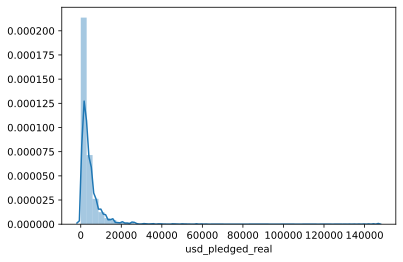

In [130]:
ax5=sns.distplot(a, kde = 3)

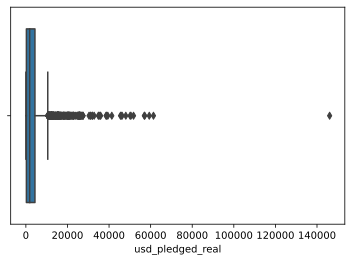

In [131]:
sns.boxplot(a)

<h1>More Outliers</h1>

In [132]:
#Dealing with Outliers for GOAL

#Calculate the interquartile
import numpy as np

q25, q50, q75 = np.percentile(refined_df3['backers'], [25, 50, 75])
iqr = q75-q25

#Calculate the min/max limits to be considered outlier
min = q25-1.5*(iqr)
max = q25+1.5*(iqr)

print('min = ', min, 'q25 = ', q25, ', q50 = ', q50, 'q75 = ', q75, 'max = ', max)

min =  -4002521.5 q25 =  470807.0 , q50 =  1401993.0 q75 =  3453026.0 max =  4944135.5


In [133]:
#Identify points
sss=[x for x in refined_df3['backers'] if x > max]
sorted(sss)


[5356513, 7255880, 11336829]

<h2> Fixing Outliers and Skews </h2>

In [134]:
num_cols=refined_df3.select_dtypes('number').columns

In [135]:
#refined_df6=refined_df3.loc[refined_df4['backers'] <= 40, :]
#print('Number of rows in the data: ', filt_cols_dance4.shape[0])
#print('Number of columns in the data: ', filt_cols_dance4.shape[1])

In [136]:
plt.figure(figsize=(16, 6))
ax6=sns.distplot(c.apply(np.log1p), kde = 20, fit = norm)

NameError: name 'c' is not defined

<Figure size 1152x432 with 0 Axes>

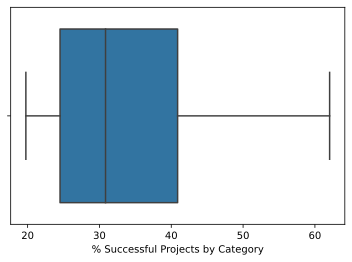

In [137]:
import seaborn as sns
sns.boxplot(refined_df4['% Successful Projects by Category'])

In [138]:
from scipy.stats import norm

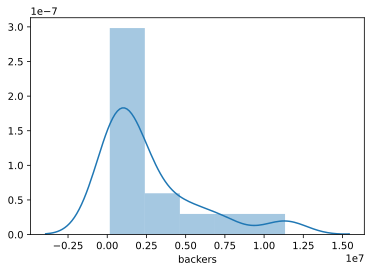

In [139]:
ax7= sns.distplot(refined_df3['backers'], kde = 10)
ax8 = refined_df3['backers'].apply(log1p)


In [140]:

#plt.figure(figsize=(20, 20))
#sns.distplot(df_data_3['backers'], kde =30)

In [141]:
df_data_3.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,2.272000e+03,2.272000e+03,2272.000000,2251.000000,2272.000000,2.272000e+03
mean,4.346927e+04,9.775884e+03,103.113116,6037.304522,7870.484925,4.162042e+04
std,4.645500e+05,9.108477e+04,432.700609,26161.452611,32417.372349,4.633370e+05
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,2.000000e+03,4.075000e+01,2.000000,19.450000,40.000000,2.000000e+03
50%,5.000000e+03,7.270000e+02,13.000000,435.000000,714.585000,5.109905e+03
75%,1.592500e+04,4.547750e+03,61.250000,3211.000000,4510.000000,1.507250e+04
max,2.000000e+07,4.075739e+06,8211.000000,604978.940000,604978.940000,2.000000e+07


In [142]:
list(filt_cols_dance.columns)

['ID',
 'name',
 'category',
 'main_category',
 'currency',
 'deadline',
 'goal',
 'launched',
 'pledged',
 'state',
 'backers',
 'country',
 'usd pledged',
 'usd_pledged_real',
 'usd_goal_real']

In [143]:
ax8.describe()

count    15.000000
mean     14.084047
std       1.337605
min      11.990872
25%      13.058070
50%      14.153406
75%      15.030957
max      16.243567
Name: backers, dtype: float64

In [144]:
ax8.pd


AttributeError: 'Series' object has no attribute 'pd'

In [145]:
ax8.reset_index(drop = True)
aa = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
bb = [23,62,48,39,21,47,73,65,33,41,87,98,44,38,19]

In [146]:
import statsmodels.api as sm
model = sm.OLS(ax8, aa)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                backers   R-squared (uncentered):                   0.719
Model:                            OLS   Adj. R-squared (uncentered):              0.699
Method:                 Least Squares   F-statistic:                              35.80
Date:                Sun, 15 Aug 2021   Prob (F-statistic):                    3.35e-05
Time:                        18:01:05   Log-Likelihood:                         -51.505
No. Observations:                  15   AIC:                                      105.0
Df Residuals:                      14   BIC:                                      105.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [147]:
mu0=16.5
muO= 14.153406
std2=2.1
nsamplesize=6
Z =  (16.5-14.153406)/(2.1/sqrt(4))
print(Z)

2.234851428571428


In [148]:
smallarea=1-0.9901
pvalue=smallarea*2
smallarea
pvalue

0.01980000000000004

In [149]:
print('Since the p-value ', pvalue, ' < 0.05 we accept the H0')

Since the p-value  0.01980000000000004  < 0.05 we accept the H0


In [150]:
refined_df3_sampleH0 = refined_df3.sample(frac=0.3, random_state=1)
refined_df3_sampleH0 

,main_category,failed,canceled,successful,suspended,live,undefined,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,Total Projects in Each Category,% Successful Projects by Category
10,Music,21752,3305,24197,149,281,2234.0,8.336140e+08,2.072948e+08,2708475,1.662658e+08,2.003187e+08,7.980919e+08,51918.0,46.606187
4,Design,14814,4152,10550,247,305,2.0,1.405280e+09,8.154909e+08,7255880,5.121320e+08,7.342202e+08,1.259073e+09,30070.0,35.084802
8,Games,16003,6202,12518,220,287,1.0,1.786610e+09,7.703319e+08,11336829,5.744020e+08,7.413273e+08,1.582708e+09,35231.0,35.531208
1,Comics,4036,842,5842,23,76,0.0,2.190160e+08,7.464365e+07,1458090,5.781692e+07,7.151839e+07,2.117433e+08,10819.0,53.997597


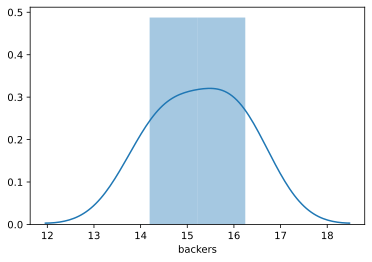

In [151]:
sns.distplot(refined_df3_sampleH0['backers'].apply(np.log1p), kde = 10)
ax9=refined_df3_sampleH0['backers'].apply(np.log1p)

In [152]:
refined_df3_sampleH0['backers'].apply(np.log1p).describe()

count     4.000000
mean     15.261356
std       0.930263
min      14.192639
25%      14.657082
50%      15.304610
75%      15.908884
max      16.243567
Name: backers, dtype: float64

In [153]:
ax9.describe()

count     4.000000
mean     15.261356
std       0.930263
min      14.192639
25%      14.657082
50%      15.304610
75%      15.908884
max      16.243567
Name: backers, dtype: float64

In [154]:
mu0=16.5
muO= 14.153406
std2=2.1
nsamplesize=6
Z =  (15.261356-14.084047)/(0.930263/sqrt(4))
print(Z)

2.5311315187210486


In [155]:
smallarea=1-0.9943
pvalue=smallarea*2
smallarea
pvalue

0.011400000000000077

In [156]:
print('Since the p-value ', pvalue, ' < 0.05 we accept the H0')

Since the p-value  0.011400000000000077  < 0.05 we accept the H0
